<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calcolo-della-dispersione-in-pandas" data-toc-modified-id="Calcolo-della-dispersione-in-pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calcolo della dispersione in pandas</a></span><ul class="toc-item"><li><span><a href="#Indici-di-dispersione" data-toc-modified-id="Indici-di-dispersione-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Indici di dispersione</a></span></li><li><span><a href="#Box-plot" data-toc-modified-id="Box-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Box plot</a></span></li><li><span><a href="#Diagrammi-Q-Q" data-toc-modified-id="Diagrammi-Q-Q-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Diagrammi Q-Q</a></span></li><li><span><a href="#Simmetria,-distribuzioni-approssimativamente-normali-e-regola-empirica" data-toc-modified-id="Simmetria,-distribuzioni-approssimativamente-normali-e-regola-empirica-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Simmetria, distribuzioni approssimativamente normali e regola empirica</a></span></li><li><span><a href="#Una-nota-sulla-produzione-dei-grafici-*" data-toc-modified-id="Una-nota-sulla-produzione-dei-grafici-*-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Una nota sulla produzione dei grafici <sup>*</sup></a></span></li></ul></li></ul></div>

<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Indici di dispersione.
</div>
<hr style="width: 90%;" align="left" />

<div id="h-0"></div>

# Calcolo della dispersione in pandas

<div id="h-1"></div>

## Indici di dispersione

Gli oggetti di tipo serie messi a disposizione da pandas permettono di calcolare facilmente i principali indici di dispersione. Importiamo, come al solito, il nostro dataset e impostiamo lo stile per i grafici.

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))


heroes = pd.read_csv('data/heroes.csv', sep=';', index_col=0)

Gli indici di dispersione di un oggetto di tipo serie si calcolano invocando su quest'ultimo degli appositi metodi. In particolare:

- `var` restiuisce la varianza campionaria;

In [5]:
year = heroes['First appearance']
year.var()

388.76870505203914

- `std` restituisce la deviazione standard campionaria;

In [6]:
year.std()

19.717218491766

- `describe` calcola i principali indici descrittivi di centralità e dispersione (quelli relativi a media, deviazione standard, minimo, primo quartile, mediana, terzo quartile e massimo), unitamente al numero di osservazioni nella serie, che utilizza per popolare un nuovo oggetto di tipo serie;

In [7]:
year.describe()

count     367.000000
mean     1979.855586
std        19.717218
min      1933.000000
25%      1965.000000
50%      1979.000000
75%      1994.000000
max      2099.000000
Name: First appearance, dtype: float64

- `quantile` restituisce il quantile corrispondente al livello specificato come argomento.

In [8]:
year.quantile(.15)

1963.0

Va sottolineato come l'eventuale calcolo di percentili, quartili o decili campionari deve essere fatto utilizzando opportunamente il metodo `quantile`, tenendo conto delle ovvie relazioni tra l'indice che si vuole calcolare e il corrispondente quantile. Per esempio, il $35$-esimo percentile si otterrà invocando `quantile(.35)`, così come il terzo quartile verrà restituito invocando `quantile(.75)` (sebbene in quest'ultimo caso si possa utilizzare anche il metodo `describe` introdotto nel punto precedente.

<div id="h-2"></div>

## Box plot

Un _box plot_ (o _box and whiskers plot_, o ancora un _diagramma a scatola_) è una rappresentazione grafica che riassume le principali caratteristiche di un campione di dati. Tale rappresentazione contiene due componenti principali:

- una _scatola_, intesa come un rettangolo che evidenzia il primo e il terzo quartile campionario dei dati, che corrispondono alle due basi, e la mediana, indicata tramite un segmento parallelo alle basi stesse;
- due _baffi_, che si estendono dagli estremi della scatola fino a raggiungere il minimo e il massimo valore osservato.

A titolo di esempio la cella seguente visualizza il box plot relativo all'anno di prima apparizione.

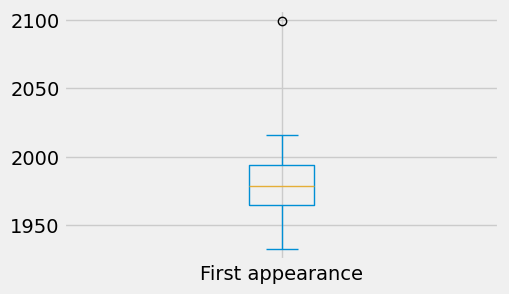

In [9]:
year.plot.box()
plt.show()

Si verifica visualmente come questo grafico metta in evidenza:

- la centralità delle osservazioni, tramite il segmento che individua la mediana campionaria;
- la loro dispersione, sia in termini di range interquartile (l'altezza della scatola) e di intervallo di variazione dei dati (la distanza tra gli estremi dei baffi).

Vale la pena sottolineare che la presenza di eventuali valori mancanti non influisce sulla generazione del grafico. È inoltre stato necessario specificare l'argomento opzionale `whis` (abbreviazione di _whiskers_). In caso contrario viene visualizzata una versione leggermente diversa di box plot, in cui le osservazioni vengono preliminarmente analizzate in modo da evidenziare eventuali _outlier_ marcandoli con dei cerchi.

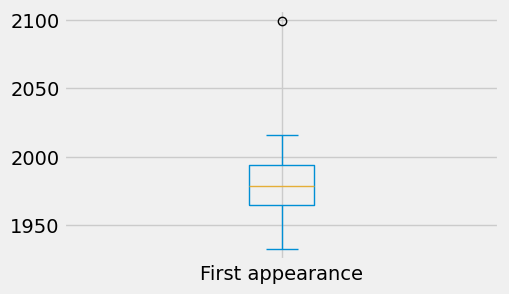

In [10]:
year.plot.box()
plt.show()

Sebbene i box plot che abbiamo ottenuto fossero visualizzati in un sistema di riferimento bidimensionale, le informazioni salienti venivano tutte reperite leggendo l'asse delle ordinate. Specificando l'argomento opzionale `vert` è possibile ottenere un diagramma equivalente visualizzando le informazioni sull'asse delle ascisse. In questo caso i valori per i quartili si leggeranno ovviamente in corrispondenza di segmenti paralleli alle altezze della scatola.

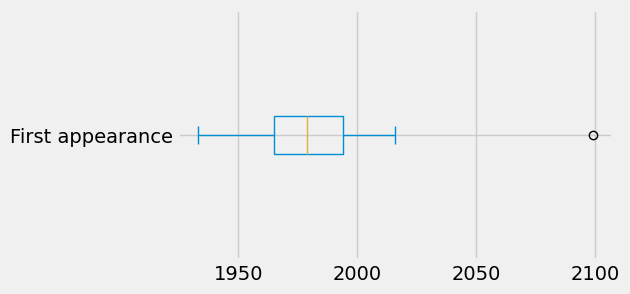

In [11]:
year.plot.box(vert=False)
plt.show()

<div id="h-3"></div>

## Diagrammi Q-Q

Un _diagramma Q-Q_ (o _diagramma quantile-quantile_) è una rappresentazione grafica che considera due campioni al fine di valutare la validità dell'ipotesi che i campioni stessi seguano una medesima distribuzione. Questi diagrammi si basano sul fatto (che non dimostreremo) che i quantili campionari rappresentano l'approssimazione di quantili teorici che, considerati tutti insieme, individuano univocamente la distribuzione dei dati.

Pertanto, se due campioni hanno un'uguale distribuzione, allora estraendo da entrambi il quantile di un livello fissato si dovranno ottenere due numeri molto vicini (in quanto essi rappresentano approssimazioni diverse di uno stesso valore).

Se consideriamo per esempio le altezze di due campioni di supereroi Marvel e DC, escludendo eventuali _outlier_ (limitando per la precisione la scelta a valori compresi tra 150 e 200 centimetri), i corrispondenti quantili di livello $0.2$ assumeranno i seguenti valori.

In [23]:
marvel = heroes.loc[(heroes['Publisher']=='Marvel Comics') & \
                    (heroes['Height'].between(150, 200))]

dc = heroes.loc[(heroes['Publisher']=='DC Comics') & \
                (heroes['Height'].between(150, 200))]

marvel_sample = marvel['Height'].sample(120)
dc_sample = dc['Height'].sample(120)

(marvel_sample.quantile(.2), dc_sample.quantile(.2))

(173.47, 170.456)

Per ottenere il diagramma Q-Q ripetiamo ora questa operazione facendo variare i livelli in una discretizzazione che copra ragionevolmente l'intervallo $[0, 1]$ e visualizziamo sul piano cartesiano un punto per ogni coppia di quantili campionari che si riferiscono a uno stesso livello.

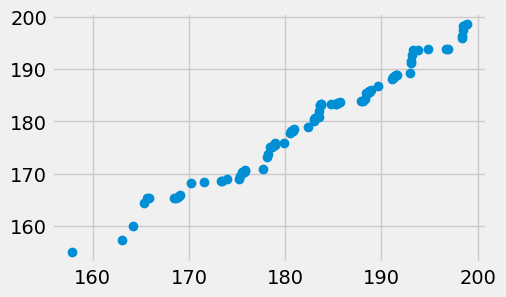

In [13]:
levels = np.linspace(0, 1, 100)
plt.plot(marvel_sample.quantile(levels),
         dc_sample.quantile(levels),
         'o')
plt.show()

Il fatto che in ogni coppia considerata i due quantili fossero molto simili tra loro fa sì che i punti ottenuti si allineino approssimativamente sulla bisettrice del primo e del terzo quadrante. Possiamo evidenziare tale fatto sovrapponendo al diagramma il grafico della retta.

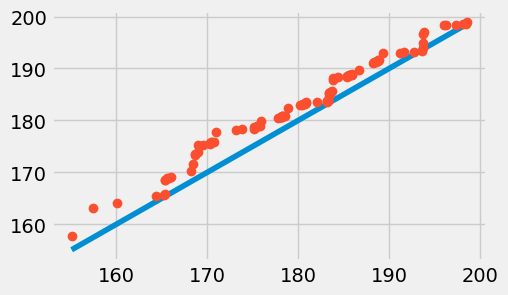

In [14]:
plt.plot([min(dc_sample), max(dc_sample)],
         [min(dc_sample), max(dc_sample)])
plt.plot(dc_sample.quantile(levels),
         marvel_sample.quantile(levels),
         'o')
plt.show()

In realtà non è necessario costruire "a mano" i diagrammi Q-Q: il package `statmodels` mette a disposizione un oggetto `api` su cui invocare il metodo `qqplot_2samples` a cui passare direttamente i due campioni, aggiungendo l'argomento opzionale `line='45'` nel caso in cui si vuole tracciare anche il riferimento della bisettrice. 

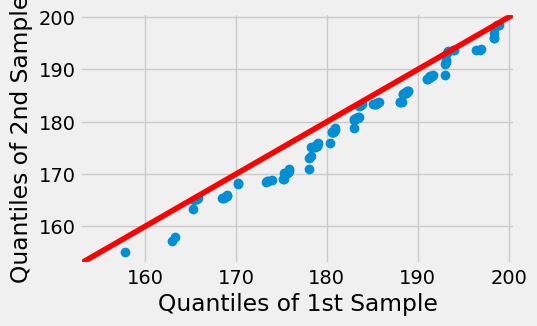

In [15]:
import statsmodels.api as sm

sm.qqplot_2samples(marvel_sample, dc_sample, line='45')
plt.show()

<div class="bs-callout bs-callout-primary">
Il diagramma prodotto da `qqplot_2samples` scambia il ruolo degli assi rispetto al diagramma precedente: è per questo motivo che i due campioni sono stati passati come argomenti considerandoli in ordine inverso rispetto a quanto fatto finora.
</div>

In sintesi, il diagramma ottenuto ci permette di avvalorare l'ipotesi che l'altezza dei supereroi non segua una distribuzione diversa nei fumetti editi da DC e Marvel.

Chiaramente, non è detto che due campioni seguano necessariamente una medesima distribuzione. In tal caso, i punti ottenuti non si disporranno vicino alla bisettrice. È questo il caso della distribuzione del peso tra supereroine e supereroi.

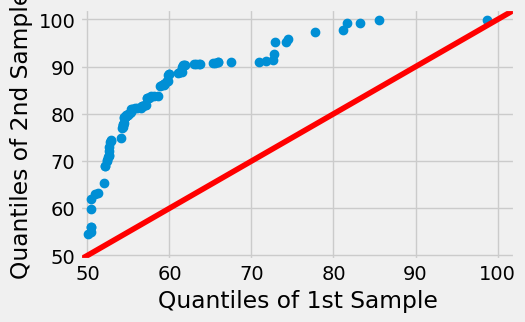

In [16]:
female = heroes.loc[(heroes['Gender']=='F') & \
                    (heroes['Weight'].between(50, 100))]

male = heroes.loc[(heroes['Gender']=='M') & \
                (heroes['Weight'].between(50, 100))]

female_sample = female['Weight'].sample(100)
male_sample = male['Weight'].sample(100)
sm.qqplot_2samples(female_sample, male_sample, line='45')
plt.show()

La tecnica del Q-Q plot permette quindi in casi come questo di confutare l'ipotesi di partenza.

Si nota infine che una standardizzazione dei dati permette di confinare il grafico ottenuto in prossimità dell'origine. In tal modo diventa più facile accorgersi di eventuali valori fuori scala.

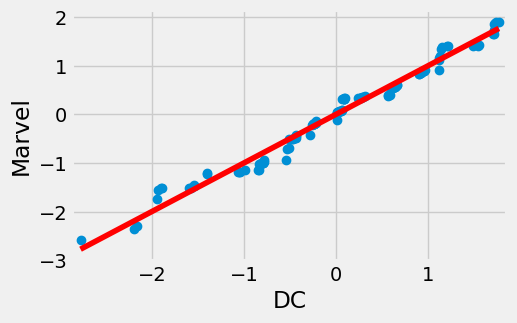

In [17]:
sm.qqplot_2samples((marvel_sample-marvel_sample.mean())/marvel_sample.std(),
                   (dc_sample-dc_sample.mean())/dc_sample.std(),
                   line='s',
                   xlabel='DC', ylabel='Marvel')
plt.show()

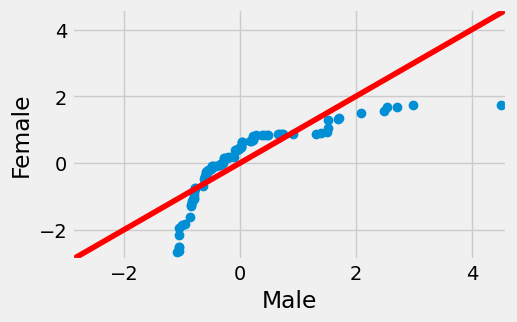

In [18]:
sm.qqplot_2samples((female_sample-female_sample.mean())/female_sample.std(),
                   (male_sample-male_sample.mean())/male_sample.std(),
                   line='45',
                   xlabel='Male', ylabel='Female')
plt.show()

<div id="h-4"></div>

## Simmetria, distribuzioni approssimativamente normali e regola empirica

Alcuni dei grafici finora visti possono essere utili per mettere in evidenza una proprietà interessante di un campione di dati legata alla simmetria delle corrispondenti frequenze. Quando le frequenze, visualizzate a seconda dei casi tramite un grafico a barre o un istogramma, tendono a distribuirsi in modo simmetrico rispetto al valore della media campionaria si dice che il campione segue una distribuzione _approssimativamente simmetrica_. Il grafico qui sotto affianca l'istogramma e il box plot di un siffatto campione. La simmetria è visibile in entrambe le rappresentazioni: l'istogramma è approssimativamente simmetrico rispetto alla sua parte centrale e nel box plot i baffi hanno all'incirca la stessa lunghezza, così come la mediana si posiziona verso il centro della scatola.

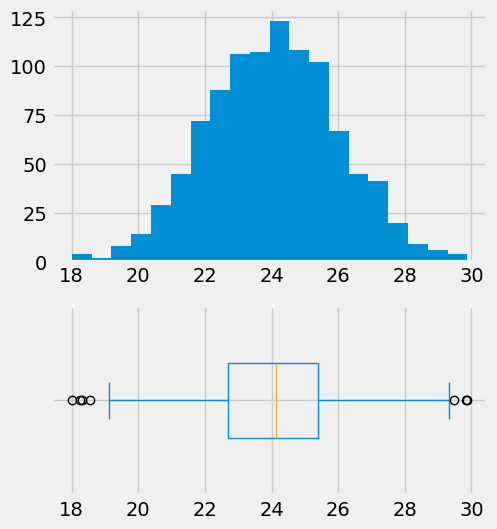

In [19]:
from scipy.stats import norm
sample = pd.Series(norm.rvs(24, 2, size=1000), name='')
f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=20, ax=h)
sample.plot.box(vert=False, ax=b, widths=.4, label=None)
plt.show()

Ho un andamento **unimodale**: la moda è unica.
Posso cresceere in modo lineare o meno. in questo caso è *non lineare*.

Questa andamento descrive una curva detta ***Gaussiana o Normale***. Che possiede diverse proprietà.

L'asimmetria in una distribuzione si può invece presentare in **due diverse modalità**:

- **tende a essere presente una "coda" nella parte destra della distribuzione delle frequenze, evidenziata da valori più bassi delle frequenze nella parte destra dell'istogramma e da un baffo destro sensibilmente più lungo nel box plot**, come esemplificato nella coppia di diagrammi qui sotto; in questo caso si parla quindi di distribuzione asimmetrica a destra (utilizzando a volte la terminologia inglese e dicendo che è presente uno _skew_ a destra);

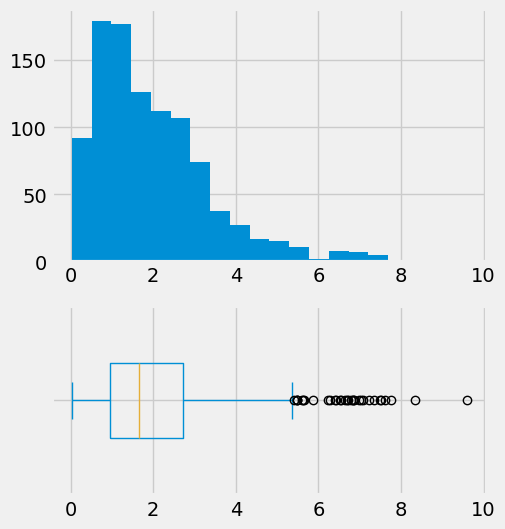

In [20]:
from scipy.stats import gamma
sample = pd.Series(gamma.rvs(2, size=1000), name='')
f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=20, ax=h)
sample.plot.box(vert=False, ax=b, widths=.4)
plt.show()

- viceversa, è possibile che la coda della distribuzione sia a sinistra, come nel grafico sottostante, e quindi si parla di asimmetria (o _skew_) a sinistra.

ValueError: whis must be a float or list of percentiles

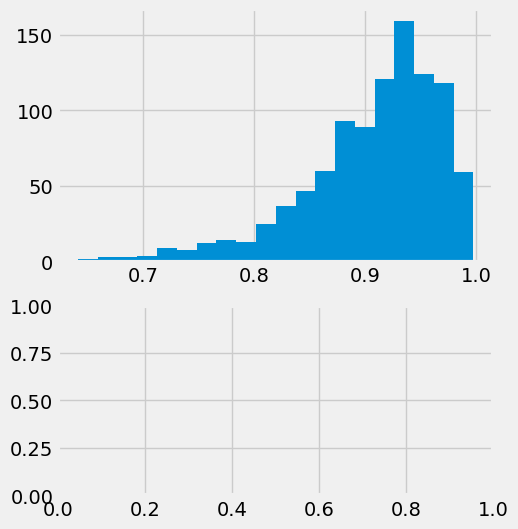

In [21]:
from scipy.stats import beta
sample = pd.Series(beta.rvs(20, 2, size=1000), name='')
f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=20, ax=h)
sample.plot.box(vert=False, whis='range', ax=b, widths=.4)
plt.show()

Consideriamo per esempio il BMI dei supereroi nei soli casi in cui il relativo valore è inferiore a $100$, e visualizziamo separatamente i corrispondenti istogramma e box plot.

In [ ]:
sample = heroes['Weight'] / (heroes['Height']/100) **2
sample = sample[sample < 100]

sample.name = 'BMI'

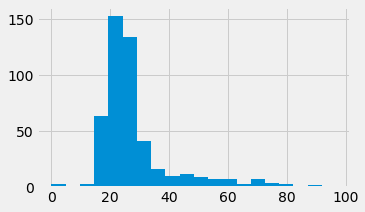

In [ ]:
sample.plot.hist(bins=20)
plt.ylabel('')
plt.show()

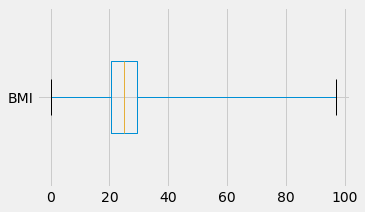

In [ ]:
sample.plot.box(vert=False, whis='range', widths=.4)
plt.show()

Si vede chiaramente la presenza di un'asimmetria a destra. Se invece consideriamo l'altezza, restringendosi ai casi in cui il corrispondente valore è compreso tra $150$ e $220$, otteniamo una distribuzione approssimativamente simmetrica.

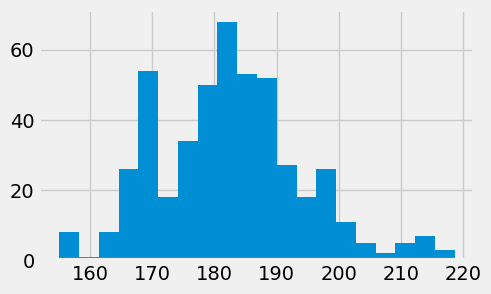

In [ ]:
sample = heroes[(heroes['Height'].between(150, 220))]['Height']
sample.plot.hist(bins=20)
plt.ylabel('')
plt.show()

ValueError: whis must be a float or list of percentiles

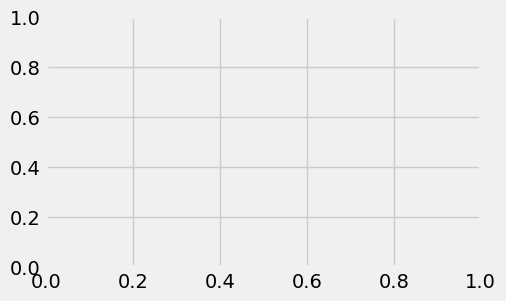

In [ ]:
sample.plot.box(vert=False, whis='range', widths=.4)
plt.show()

Tra le distribuzioni approssimativamente simmetriche, un ruolo particolare spetta alle cosiddette distribuzioni _approssimativamente normali_, in cui la simmetria è accompagnata da una forma "a campana" del grafico delle frequenze. In questo tipo di distribuzioni i dati si concentrano attorno alla media campionaria secondo la seguente _regola empirica_:

- approssimativamente il 68% delle osservazioni dista dalla media campionaria non più di una deviazione standard campionaria;
- approssimativamente il 95% delle osservazioni dista dalla media campionaria non più di due deviazioni standard campionarie;
- approssimativamente il 99.7% delle osservazioni dista dalla media campionaria non più di tre deviazioni standard campionarie.

Siccome il grafico delle frequenze dell'altezza ha approssimativamente un andamento a campana, possiamo controllare numericamente se questa regola empirica risulti verificata.

In [ ]:
def check_empirical_rule(n):
    within = len(sample[np.abs(sample - sample.mean()) < n*sample.std()])
    return  within / len(sample)

pd.DataFrame([check_empirical_rule(n) for n in range(1, 4)], columns=['%'],
             index=range(1, 4))

,%
1,0.672269
2,0.947479
3,0.993697


I risultati ottenuti sono altamente in accordo con le percentuali sopra indicate, e quindi l'ipotesi iniziale che le altezze considerate fossero distribuite in modo approssimativamente normale risulta validata.

<div id="h-5"></div>

## Una nota sulla produzione dei grafici <sup>*</sup>

I lettori più curiosi si saranno probabilmente chiesti come mai gli esempi riportati all'inizio del paragrafo precedente affiancassero istogrammi e box plot, mentre quando è stato mostrato come analizzare lo stato di simmetria della distribuzione di un campione questi due grafici sono stati costruiti separatamente. Ciò è dovuto al fatto che l'utilizzo di `subplot` permette di creare più grafici in una stessa figura, con il vincolo che le loro dimensioni devono essere uguali. Questo avrebbe avuto come effetto quello di ottenere un istogramma con delle barre molto basse, o in alternativa un box plot con un'altezza troppo elevata. In entrambi i casi si sarebbe quindi generato un grafico non particolarmente agevole da leggere. Una soluzione a questo problema, non introdotta prima per non complicare inutilmente la spiegazione, consiste nell'utilizzare come nella cella seguente il metodo `plt.subplots`.

ValueError: whis must be a float or list of percentiles

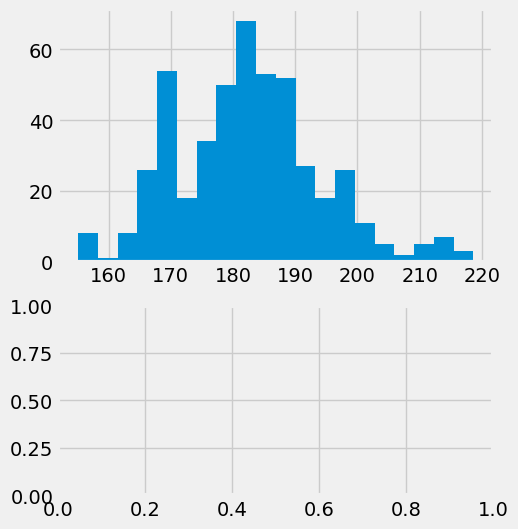

In [ ]:
f, (h, b) = plt.subplots(2, 1, gridspec_kw = {'height_ratios':[4, 3]})
f.set_figheight(6)

h.yaxis.label.set_visible(False)

sample.plot.hist(bins=20, ax=h)
sample.plot.box(vert=False, whis='range', ax=b, widths=.4)
plt.show()

Vediamo nell'ordine quali sono i punti interessanti nel codice che ha prodotto questo grafico:

1. il metodo `plt.subplots` accetta due argomenti il cui significato è lo stesso di quelli di `plt.subplot`: pertanto nella prima riga si genera una figura con due righe, ognuna contenente un asse;
2. lo stesso metodo restituisce dei riferimenti alla figura e ai due assi;
3. l'argomento opzionale `gridspec_kw` permette di specificare un dizionario con informazioni addizionali: nel nostro caso le altezze relative dei due assi;
4. usando il riferimento alla figura è possibile invocare il metodo `set_figheight` al fine di impostare l'altezza globale della figura;
5. analogamente, tramite il riferimento agli assi è possibile disattivare la visualizzazione dell'etichetta sull'asse delle ascisse dell'istogramma (tale etichetta conterrebbe il testo `'Frequency'`, dunque non sarebbe particolarmente informativa);
6. l'invocazione dei metodi `hist` e `box` viene fatta specificando per l'argomento opzionale `ax` i riferimenti agli assi restituiti da `plt.subplots`;
7. infine, nella creazione del box plot viene specificato un valore per l'argomento opzionale `width` che permette di ottenere un grafico in cui la scatola ha un'altezza più alta di quella predefinita, al fine di migliorare la leggibilità del risultato.

<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Indici di dispersione, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
</div>